In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Read in the data

In [2]:
path=r'C:\Users\aleci\Documents\Project 3 - Mortgage Origination Analysis\data\\'

file_2020q1_OH=pd.read_csv(path+'file_2020Q1_OH.csv')
file_2020q1_VA=pd.read_csv(path+'file_2020Q1_VA.csv')
file_2020q1_GA=pd.read_csv(path+'file_2020Q1_GA.csv')
file_2020q1_MI=pd.read_csv(path+'file_2020Q1_MI.csv')
file_2020q1_CO=pd.read_csv(path+'file_2020Q1_CO.csv')

In [3]:
df=pd.concat([file_2020q1_OH, file_2020q1_VA, file_2020q1_GA, file_2020q1_MI, file_2020q1_CO])
df.shape

(2071611, 108)

In [4]:
df['LOAN_ID'].nunique()

104924

In [5]:
df.groupby('STATE')['LOAN_ID'].count()

STATE
CO    485045
GA    428255
MI    479014
OH    339552
VA    339745
Name: LOAN_ID, dtype: int64

## Part 2: Define 'bad'
* We intend to apply a more stringent criterion for defining 'bad'.
* This definition bad will be used to build a payment default model.
* Two things to consider for defining such a variable as 'bad'?
** The definition should be representative of bad/derogatory behavior
** We can get enough such data points for modeling

In [6]:
df.columns.tolist()

['POOL_ID',
 'LOAN_ID',
 'ACT_PERIOD',
 'CHANNEL',
 'SELLER',
 'SERVICER',
 'MASTER_SERVICER',
 'ORIG_RATE',
 'CURR_RATE',
 'ORIG_UPB',
 'ISSUANCE_UPB',
 'CURRENT_UPB',
 'ORIG_TERM',
 'ORIG_DATE',
 'FIRST_PAY',
 'LOAN_AGE',
 'REM_MONTHS',
 'ADJ_REM_MONTHS',
 'MATR_DT',
 'OLTV',
 'OCLTV',
 'NUM_BO',
 'DTI',
 'CSCORE_B',
 'CSCORE_C',
 'FIRST_FLAG',
 'PURPOSE',
 'PROP',
 'NO_UNITS',
 'OCC_STAT',
 'STATE',
 'MSA',
 'ZIP',
 'MI_PCT',
 'PRODUCT',
 'PPMT_FLG',
 'IO',
 'FIRST_PAY_IO',
 'MNTHS_TO_AMTZ_IO',
 'DLQ_STATUS',
 'PMT_HISTORY',
 'MOD_FLAG',
 'MI_CANCEL_FLAG',
 'Zero_Bal_Code',
 'ZB_DTE',
 'LAST_UPB',
 'RPRCH_DTE',
 'CURR_SCHD_PRNCPL',
 'TOT_SCHD_PRNCPL',
 'UNSCHD_PRNCPL_CURR',
 'LAST_PAID_INSTALLMENT_DATE',
 'FORECLOSURE_DATE',
 'DISPOSITION_DATE',
 'FORECLOSURE_COSTS',
 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
 'ASSET_RECOVERY_COSTS',
 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS',
 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
 'NET_SALES_PROCEEDS',
 'CREDIT_ENHANCEMENT_PROCEEDS',
 'REPUR

In [7]:
df.groupby('DLQ_STATUS')['LOAN_ID'].count()

DLQ_STATUS
0     2019379
1       14783
2        7204
3        5353
4        3983
5        3351
6        2724
7        2209
8        1934
9        1704
10       1510
11       1368
12       1146
13        963
14        856
15        746
16        617
17        557
18        409
19        296
20        250
21        145
22         70
23         40
24         14
Name: LOAN_ID, dtype: int64

In [8]:
df['bad']=np.where(df['DLQ_STATUS'] >= 6, 1, 0)
df_bad=df.groupby('LOAN_ID')['bad'].sum().reset_index()
df_bad['bad']=np.where(df_bad['bad'] > 0, 1, 0)

In [9]:
print(df_bad['bad'].mean())
print(df_bad['bad'].sum())

0.02353131790629408
2469


In [10]:
df_bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104924 entries, 0 to 104923
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   LOAN_ID  104924 non-null  int64
 1   bad      104924 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 1.2 MB


In [11]:
df_nodup=df.drop_duplicates(subset='LOAN_ID', keep='first').reset_index()

In [12]:
df_nodup.columns.tolist()

['index',
 'POOL_ID',
 'LOAN_ID',
 'ACT_PERIOD',
 'CHANNEL',
 'SELLER',
 'SERVICER',
 'MASTER_SERVICER',
 'ORIG_RATE',
 'CURR_RATE',
 'ORIG_UPB',
 'ISSUANCE_UPB',
 'CURRENT_UPB',
 'ORIG_TERM',
 'ORIG_DATE',
 'FIRST_PAY',
 'LOAN_AGE',
 'REM_MONTHS',
 'ADJ_REM_MONTHS',
 'MATR_DT',
 'OLTV',
 'OCLTV',
 'NUM_BO',
 'DTI',
 'CSCORE_B',
 'CSCORE_C',
 'FIRST_FLAG',
 'PURPOSE',
 'PROP',
 'NO_UNITS',
 'OCC_STAT',
 'STATE',
 'MSA',
 'ZIP',
 'MI_PCT',
 'PRODUCT',
 'PPMT_FLG',
 'IO',
 'FIRST_PAY_IO',
 'MNTHS_TO_AMTZ_IO',
 'DLQ_STATUS',
 'PMT_HISTORY',
 'MOD_FLAG',
 'MI_CANCEL_FLAG',
 'Zero_Bal_Code',
 'ZB_DTE',
 'LAST_UPB',
 'RPRCH_DTE',
 'CURR_SCHD_PRNCPL',
 'TOT_SCHD_PRNCPL',
 'UNSCHD_PRNCPL_CURR',
 'LAST_PAID_INSTALLMENT_DATE',
 'FORECLOSURE_DATE',
 'DISPOSITION_DATE',
 'FORECLOSURE_COSTS',
 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
 'ASSET_RECOVERY_COSTS',
 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS',
 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
 'NET_SALES_PROCEEDS',
 'CREDIT_ENHANCEMENT_PROCEEDS

In [13]:
df_nodup=pd.merge(df_nodup.drop('bad', axis=1), df_bad, on='LOAN_ID', how='inner')

In [14]:
df_nodup['bad'].mean()

0.02353131790629408

## Part 3: Select variables for modeling
* Since this is an underwriting model, we will only select those variables available at the time of origination. 
* These varibles do not change their values throughout the life of a loan. 

In [18]:
def dummyvar(x):
    x['purpose_rate_refi']=np.where(x['PURPOSE'].str.strip()=='R', 1, 0)
    x['purpose_cashout_refi']=np.where(x['PURPOSE'].str.strip()=='C', 1, 0)
    x['property_pud']=np.where(x['PROP'].str.strip()=='PU', 1, 0)
    x['property_condo']=np.where(x['PROP'].str.strip()=='CO', 1, 0)
    x['property_other']=np.where(x['PROP'].str.strip().isin(['CP', 'MH']), 1, 0)
    x['term_30years']=np.where(x['ORIG_TERM']==360, 1, 0)
    x['term_15years']=np.where(x['ORIG_TERM']==180, 1, 0)
    x['mi']=np.where(x['MI_PCT'] > 0, 1, 0)
    
dummyvar(df_nodup)

In [19]:
columns_to_keep=['CSCORE_B', 'DTI', 'OLTV', 'ORIG_UPB', 'bad', 'LOAN_ID']

df_nodup[columns_to_keep].describe().T

,count,mean,std,min,25%,50%,75%,max
CSCORE_B,104873.0,7.567624e+02,42.412137,620.0,729.00,766.0,791.00,835.0
DTI,104922.0,3.415779e+01,9.579630,1.0,27.00,35.0,42.00,50.0
OLTV,104924.0,7.392929e+01,16.254267,7.0,65.00,76.0,85.00,97.0
ORIG_UPB,104924.0,2.537213e+05,123826.341576,10000.0,156000.00,237000.0,335000.00,800000.0
bad,104924.0,2.353132e-02,0.151584,0.0,0.00,0.0,0.00,1.0
LOAN_ID,104924.0,9.917922e+07,197019.945107,98836742.0,99009455.75,99180553.5,99349026.75,99520476.0


In [54]:
# remove loans with no credit score or DTI
df_sample=df_nodup[(df_nodup['CSCORE_B'] > 0) & (df_nodup['DTI'] > 0)][columns_to_keep]
df_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
CSCORE_B,104871.0,7.567624e+02,42.412282,620.0,729.0,766.0,791.0,835.0
DTI,104871.0,3.416106e+01,9.578838,1.0,27.0,35.0,42.0,50.0
OLTV,104871.0,7.392818e+01,16.254008,7.0,65.0,76.0,85.0,97.0
ORIG_UPB,104871.0,2.537530e+05,123823.523399,10000.0,156000.0,237000.0,335000.0,800000.0
bad,104871.0,2.354321e-02,0.151622,0.0,0.0,0.0,0.0,1.0
LOAN_ID,104871.0,9.917920e+07,197011.330265,98836742.0,99009454.5,99180544.0,99349004.0,99520476.0


## Part 4: Create additional features

* Split the sample into a modeling sample and a validation sample

In [69]:
# create a few more variables
df_sample['ORIG_UPB']=np.log(df_sample['ORIG_UPB'])
df_sample['DTI_OTV']=df_sample['DTI']/df_sample['OLTV']
df_sample['home_price']=df_sample['ORIG_UPB']/df_sample['OLTV']
df_sample['home_price_log']=np.log(df_sample['home_price'])
df_sample['home_price_fico']=df_sample['CSCORE_B']/df_sample['home_price_log']

In [70]:
x=df_sample.drop('bad', axis=1)
y=df_sample['bad']

In [71]:
df_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
CSCORE_B,104871.0,7.567624e+02,42.412282,6.200000e+02,7.290000e+02,7.660000e+02,7.910000e+02,8.350000e+02
DTI,104871.0,3.416106e+01,9.578838,1.000000e+00,2.700000e+01,3.500000e+01,4.200000e+01,5.000000e+01
OLTV,104871.0,7.392818e+01,16.254008,7.000000e+00,6.500000e+01,7.600000e+01,8.500000e+01,9.700000e+01
ORIG_UPB,104871.0,2.509544e+00,0.044755,2.220327e+00,2.481368e+00,2.515744e+00,2.543324e+00,2.609508e+00
bad,104871.0,2.354321e-02,0.151622,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
LOAN_ID,104871.0,9.917920e+07,197011.330265,9.883674e+07,9.900945e+07,9.918054e+07,9.934900e+07,9.952048e+07
DTI_OTV,104871.0,4.909012e-01,0.216396,1.428571e-02,3.604651e-01,4.625000e-01,5.733333e-01,6.000000e+00
home_price,104871.0,3.646799e-02,0.013212,2.374955e-02,2.963237e-02,3.277671e-02,3.877354e-02,3.490672e-01
home_price_log,104871.0,-3.352499e+00,0.262676,-3.740192e+00,-3.518888e+00,-3.418037e+00,-3.250017e+00,-1.052491e+00
home_price_fico,104871.0,-2.275558e+02,27.047704,-7.487001e+02,-2.371175e+02,-2.238235e+02,-2.111682e+02,-1.693007e+02


In [72]:
x.shape, y.shape

((104871, 9), (104871,))

In [73]:
# split the sample into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0)

In [74]:
x_train.shape, x_test.shape

((73409, 9), (31462, 9))

In [75]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [76]:
x_train

array([[ 0.40735144, -0.54154947, -0.54802405, ...,  0.05445674,
         0.23137678, -0.28064675],
       [ 0.4308852 , -0.22828757,  1.29716966, ..., -0.75729257,
        -1.06393796,  0.52335029],
       [ 0.57208774,  0.81591873,  0.37457281, ..., -0.33304137,
        -0.3324616 ,  0.01843858],
       ...,
       [ 1.16043165, -1.27249388, -0.24049176, ...,  0.01145337,
         0.17277218, -0.59743792],
       [-0.76933639, -1.89901766, -1.16308862, ...,  0.60519071,
         0.91153862, -0.18646654],
       [ 1.32516795,  0.29381558,  0.92813092, ..., -0.61058535,
        -0.79478061, -0.0271346 ]])

In [77]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [78]:
x_train.shape, x_test.shape

((73409, 9), (31462, 9))

In [79]:
# reshape the dataset
# You must add a 3rd dimension in order to run neural network
x_train=x_train.reshape(73409, 9, 1)
x_test=x_test.reshape(31462, 9, 1)

In [80]:
x_train.shape, x_test.shape

((73409, 9, 1), (31462, 9, 1))

### Part 3: Artificial Neural Network (ANN)
#### Part 3.1: set up the ANN model structure

In [81]:
import tensorflow as tf
print(tf.__version__)

model=tf.keras.models.Sequential()

# set up initial input layer
# input_dim should be the same as number of input variables
model.add(tf.keras.layers.Dense(units=9, activation='relu', input_dim=9))

# add 2nd hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu'))

# output layer
# units should be the same as the predicted goal. In our case, we are predicting bad, so units=1.
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

2.11.0-dev20220812
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 9)                 90        
                                                                 
 dense_10 (Dense)            (None, 6)                 60        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


#### 3.2: Run ANN model

In [82]:
# Epoch is the number of iterations
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
7341/7341 [==============================] - 14s 2ms/step - loss: 0.1247 - accuracy: 0.9714
Epoch 2/10
7341/7341 [==============================] - 13s 2ms/step - loss: 0.1048 - accuracy: 0.9764
Epoch 3/10
7341/7341 [==============================] - 13s 2ms/step - loss: 0.1045 - accuracy: 0.9764
Epoch 4/10
7341/7341 [==============================] - 14s 2ms/step - loss: 0.1043 - accuracy: 0.9764
Epoch 5/10
7341/7341 [==============================] - 13s 2ms/step - loss: 0.1043 - accuracy: 0.9764
Epoch 6/10
7341/7341 [==============================] - 13s 2ms/step - loss: 0.1040 - accuracy: 0.9764
Epoch 7/10
7341/7341 [==============================] - 13s 2ms/step - loss: 0.1040 - accuracy: 0.9764
Epoch 8/10
7341/7341 [==============================] - 13s 2ms/step - loss: 0.1041 - accuracy: 0.9764
Epoch 9/10
7341/7341 [==============================] - 13s 2ms/step - loss: 0.1039 - accuracy: 0.9764
Epoch 10/10
7341/7341 [==============================] - 13s 2ms/step - l

In [83]:
# evaluate the model
test_loss, test_acc=model.evaluate(x_test, y_test)

984/984 [==============================] - 2s 2ms/step - loss: 0.1014 - accuracy: 0.9767


In [84]:
print("Test Accuracy: {}".format(test_acc))

Test Accuracy: 0.9766702651977539


In [85]:
# The following only works for tensorflow 2.6 or later.
# for earlier version of tensorflow 2.0, use predict_classes(x_test)
y_pred=model.predict(x_test)
classes_y=np.argmax(y_pred, axis=1)

984/984 [==============================] - 2s 2ms/step


In [86]:
y_pred

array([[0.02174515],
       [0.02192432],
       [0.06808943],
       ...,
       [0.07097165],
       [0.01774679],
       [0.03074125]], dtype=float32)

In [87]:
y_pred_df=pd.DataFrame(y_pred)
y_pred_df.columns=['y_pred']

In [88]:
y_test_df=pd.DataFrame(y_test)
y_test_df.columns=['y']

In [89]:
y_test_df['y_pred']=y_pred_df

In [90]:
num_bins=10

binlabels=list(range(0, num_bins))

y_test_df['score_cut']=pd.qcut(y_test_df['y_pred'], q=num_bins, labels=binlabels)

C:\Users\aleci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score_cut', ylabel='y'>

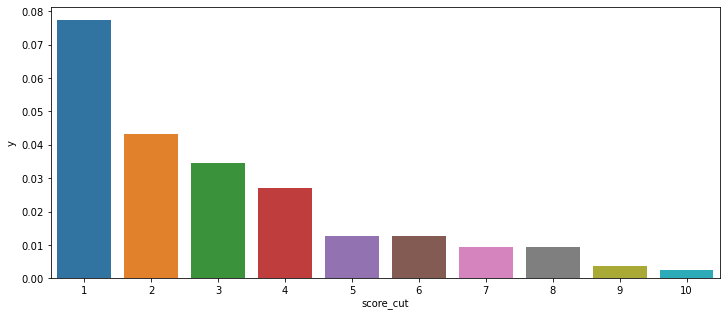

In [91]:
fig=plt.figure(figsize=(12, 5))

y_test_df_sum=y_test_df.groupby('score_cut')[['y_pred', 'y']].mean().reset_index()
y_test_df_sum['score_cut']=y_test_df_sum['score_cut'].astype(int)
y_test_df_sum['score_cut']=num_bins-y_test_df_sum['score_cut']

sns.barplot(y_test_df_sum['score_cut'], y_test_df_sum['y'])

Text(0, 0.5, 'Predicted/Actual')

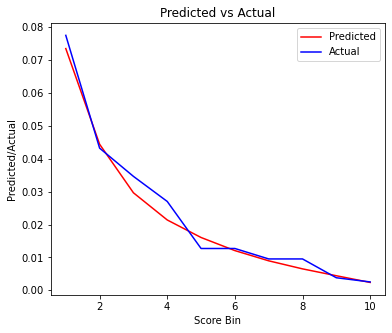

In [92]:
fig, ax=plt.subplots(1, 1, figsize=(6, 5))

ax.plot(y_test_df_sum['score_cut'], y_test_df_sum['y_pred'], label='Predicted', color='red')
ax.plot(y_test_df_sum['score_cut'], y_test_df_sum['y'], label='Actual', color='blue')
ax.set_title('Predicted vs Actual')
ax.legend(loc='upper right')
ax.set_xlabel('Score Bin')
ax.set_ylabel('Predicted/Actual')

### Part 3: Convoluted Neural Network (CNN)
#### 3.1: Set up the CNN model structure

In [103]:
# define an object for the model
model=tf.keras.models.Sequential()

In [104]:
# 1st CNN layer
# input shape should correpond to number of input variables
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(9, 1)))

# batch normalization 
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
# This layer deliberately exclude some data so that the model will not overfit
# Usually select 0.2-0.5 as the dropout rate
model.add(tf.keras.layers.Dropout(0.2))

# 2nd CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))

# batch normalization 
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [105]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [106]:
# first dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [107]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [108]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 9, 32)             96        
                                                                 
 batch_normalization_2 (Batc  (None, 9, 32)            128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 4, 32)             0         
                                                                 
 conv1d_4 (Conv1D)           (None, 4, 64)             4160      
                                                                 
 batch_normalization_3 (Batc  (None, 4, 64)           

In [109]:
# learning rate is one of hyperparameters
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

In [110]:
# compile the CNN model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#### part 3.2: Run CNN model

In [111]:
history=model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
2295/2295 [==============================] - 11s 4ms/step - loss: 0.1702 - accuracy: 0.9610 - val_loss: 0.1098 - val_accuracy: 0.9767
Epoch 2/25
2295/2295 [==============================] - 10s 4ms/step - loss: 0.1274 - accuracy: 0.9761 - val_loss: 0.1066 - val_accuracy: 0.9767
Epoch 3/25
2295/2295 [==============================] - 10s 4ms/step - loss: 0.1201 - accuracy: 0.9763 - val_loss: 0.1063 - val_accuracy: 0.9767
Epoch 4/25
2295/2295 [==============================] - 10s 4ms/step - loss: 0.1171 - accuracy: 0.9764 - val_loss: 0.1090 - val_accuracy: 0.9767
Epoch 5/25
2295/2295 [==============================] - 10s 4ms/step - loss: 0.1146 - accuracy: 0.9764 - val_loss: 0.1063 - val_accuracy: 0.9767
Epoch 6/25
2295/2295 [==============================] - 11s 5ms/step - loss: 0.1143 - accuracy: 0.9764 - val_loss: 0.1070 - val_accuracy: 0.9767
Epoch 7/25
2295/2295 [==============================] - 10s 4ms/step - loss: 0.1129 - accuracy: 0.9764 - val_loss: 0.1058 - val_ac

In [112]:
# model predictions
y_pred=model.predict(x_test)
classes_y=np.argmax(y_pred, axis=1)

984/984 [==============================] - 2s 2ms/step


In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, classes_y)
print(cm)

[[30728     0]
 [  734     0]]


In [114]:
acc_cm=accuracy_score(y_test, classes_y)
print(acc_cm)

0.9766702688958108


In [115]:
# Learning curve
def learning_curve(history, epoch):
    # training vs validation accuracy
    epoch_range=range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()
    

    # training vs validation loss
    epoch_range=range(1, epoch+1)
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('LOss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()

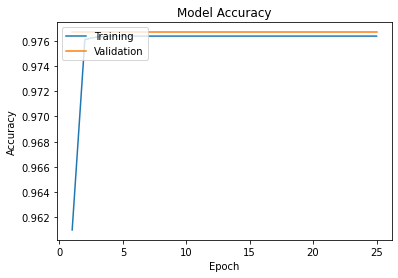

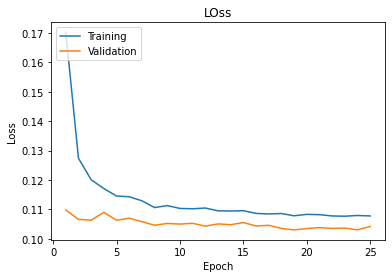

In [116]:
learning_curve(history, 25)

In [117]:
y_pred_df=pd.DataFrame(y_pred)
y_pred_df.columns=['y_pred']

In [118]:
y_test_df=pd.DataFrame(y_test)
y_test_df.columns=['y']

In [119]:
y_test_df['y_pred']=y_pred_df

In [120]:
y_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31462 entries, 0 to 31461
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       31462 non-null  int32  
 1   y_pred  31462 non-null  float32
dtypes: float32(1), int32(1)
memory usage: 245.9 KB


In [123]:
num_bins=10

binlabels=list(range(0, num_bins))

y_test_df['score_cut']=pd.qcut(y_test_df['y_pred'], q=num_bins, labels=binlabels)

C:\Users\aleci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score_cut', ylabel='y'>

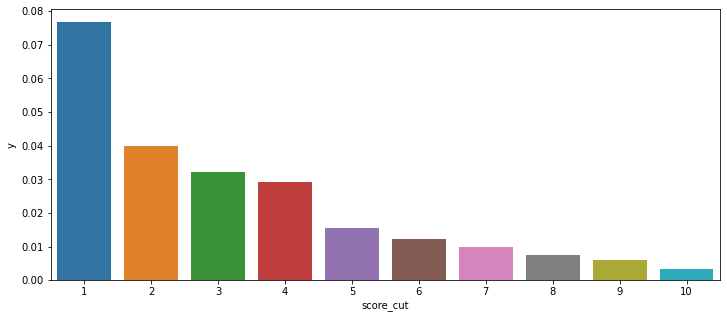

In [124]:
fig=plt.figure(figsize=(12, 5))

y_test_df_sum=y_test_df.groupby('score_cut')[['y_pred', 'y']].mean().reset_index()
y_test_df_sum['score_cut']=y_test_df_sum['score_cut'].astype(int)
y_test_df_sum['score_cut']=num_bins-y_test_df_sum['score_cut']

sns.barplot(y_test_df_sum['score_cut'], y_test_df_sum['y'])

Text(0, 0.5, 'Predicted/Actual')

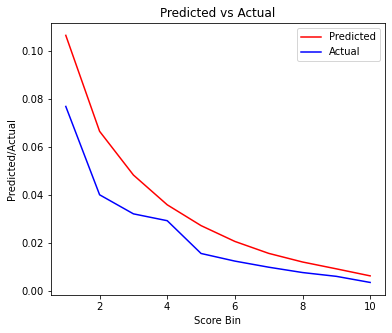

In [125]:
fig, ax=plt.subplots(1, 1, figsize=(6, 5))

ax.plot(y_test_df_sum['score_cut'], y_test_df_sum['y_pred'], label='Predicted', color='red')
ax.plot(y_test_df_sum['score_cut'], y_test_df_sum['y'], label='Actual', color='blue')
ax.set_title('Predicted vs Actual')
ax.legend(loc='upper right')
ax.set_xlabel('Score Bin')
ax.set_ylabel('Predicted/Actual')